In [1]:
import plotIq

Get the SAXS data.

If 'merged', the R script mergeSAXSdata.R has been used to merge long and short q ranges.

In [2]:
carK_saxs_file = "../../resultsPaper/saxs/Carragenan_K_1car30KCl10A_merged.dat"
carNa_saxs_file = "../../resultsPaper/saxs/Carragenan_Na_1car300NaCl10A_merged.dat"
pectin_saxs_file = "../../resultsPaper/saxs/Pectin1Acid_1car200NaCl10A_merged.dat"

carK_saxs_data = plotIq.parse_saxs_data(input_file=carK_saxs_file)
carNa_saxs_data = plotIq.parse_saxs_data(input_file=carNa_saxs_file)
pectin_saxs_data = plotIq.parse_saxs_data(input_file=pectin_saxs_file)

Get the Radial Intensity analysis of the original TEM images.

Original images are named:

carK: Montage_832.tif

carNa: Montage_851.tif

pectin (acid) : pectin1_1045_homogeneous.tif

These images are analyzed using the executable SAXS_tem_functional (c++): https://github.com/phcerdan/FFTRadialIntenstiy to generate a data file with q (radius in the freq domain) versus I (average radial intensity). 

In [3]:

carK_original_file = "../../resultsPaper/carK_Montage_832.plot"
carNa_original_file = "../../resultsPaper/carNa_Montage_851.plot"
pectin_original_file = "../../resultsPaper/pectin1_1045_homogeneous.plot"

#carK_original_file_SAXSsimClass = "../../resultsPaper/SAXSsimClass/carrageenanK832.plot"
#carNa_original_file_SAXSsimClass = "../../resultsPaper/SAXSsimClass/carrageenanNa851.plot"
#pectin_original_file_SAXSsimClass = "../../resultsPaper/SAXSsimClass/pectinAcid.plot"

carK_original_data = plotIq.parse_data(input_file=carK_original_file)
carNa_original_data = plotIq.parse_data(input_file=carNa_original_file)
pectin_original_data = plotIq.parse_data(input_file=pectin_original_file)

In [4]:
nm_per_pixel = 0.86
I_multiplier = 10**-8
carK_original_data = plotIq.scale_data(carK_original_data, nm_per_pixel, I_multiplier * 10**-1)
carNa_original_data = plotIq.scale_data(carNa_original_data, nm_per_pixel, I_multiplier * 10**-2)
pectin_original_data = plotIq.scale_data(pectin_original_data, nm_per_pixel, I_multiplier * 10**-5)

Trim noisy data at the extremes:

Scale q in the image, taking into acount pixel resolution of microscopy images.

In [5]:
# SAXS: Use pectin acid last q-value as the cutoff
#q_saxscutoff = pectin_saxs_data['q'].iloc[-1]
#print("q_saxscutoff:",q_saxscutoff)
#valid_qrange = carK_saxs_data['q'] <= q_saxscutoff
#carK_saxs_data = carK_saxs_data[valid_qrange]
#valid_qrange = carNa_saxs_data['q'] <= q_saxscutoff
#carNa_saxs_data = carNa_saxs_data[valid_qrange]
#valid_qrange = pectin_saxs_data['q'] <= q_saxscutoff
#pectin_saxs_data = pectin_saxs_data[valid_qrange]

Plotting:

In [6]:
opt_params = {'legend.loc': 'upper right'}
plotIq.plot_params(opt_params)
tem_color = 'C0'
saxs_color = 'C1'

Select a cutoff to differentiate low and high q regions where there is agreement.

In [7]:
qcutoff = 0.1

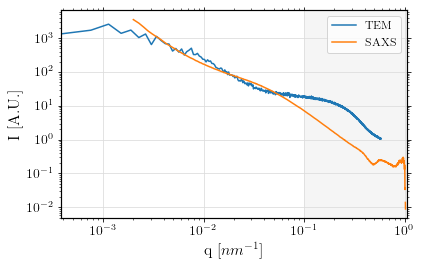

In [8]:
fig_carK, ax_carK = plotIq.plt.subplots(1,1)

ax_carK = plotIq.plot_data(carK_original_data, axes=ax_carK )
ax_carK = plotIq.plot_data(carK_saxs_data, axes=ax_carK)
plotIq.plot_vline(qcutoff, carK_saxs_data, ax_carK)
tem_line = ax_carK.lines[0]
tem_line.set_color(tem_color)
saxs_line = ax_carK.lines[1]
saxs_line.set_color(saxs_color)
ax_carK.legend(ax_carK.lines, ['TEM', 'SAXS'])
plotIq.plt.show()

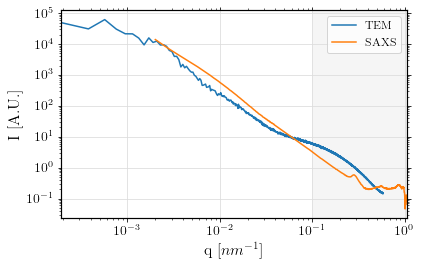

In [9]:
fig_carNa, ax_carNa = plotIq.plt.subplots(1,1)

ax_carNa = plotIq.plot_data(carNa_original_data, axes=ax_carNa )
ax_carNa = plotIq.plot_data(carNa_saxs_data, axes=ax_carNa)
plotIq.plot_vline(qcutoff, carNa_saxs_data, ax_carNa)
tem_line = ax_carNa.lines[0]
tem_line.set_color(tem_color)
saxs_line = ax_carNa.lines[1]
saxs_line.set_color(saxs_color)
ax_carNa.legend(ax_carNa.lines, ['TEM', 'SAXS'])
plotIq.plt.show()

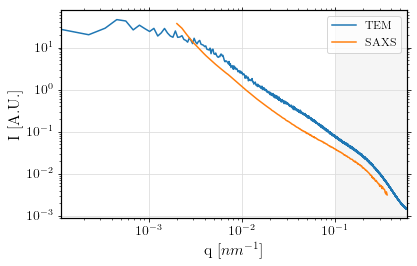

In [10]:
fig_pectin, ax_pectin = plotIq.plt.subplots(1,1)
ax_pectin = plotIq.plot_data(pectin_original_data, axes=ax_pectin )
ax_pectin = plotIq.plot_data(pectin_saxs_data, axes=ax_pectin )
plotIq.plot_vline(qcutoff, pectin_original_data, ax_pectin)
tem_line = ax_pectin.lines[0]
tem_line.set_color(tem_color)
saxs_line = ax_pectin.lines[1]
saxs_line.set_color(saxs_color)
ax_pectin.legend(ax_pectin.lines, ['TEM', 'SAXS'])
plotIq.plt.show()


Save figures to pdf:

In [11]:
fig_carK.subplots_adjust(bottom=0.155)
fig_carK.savefig("saxs-tem-carK.pdf")
fig_carNa.subplots_adjust(bottom=0.155)
fig_carNa.savefig("saxs-tem-carNa.pdf")
fig_pectin.subplots_adjust(bottom=0.155)
fig_pectin.savefig("saxs-tem-pectin.pdf")

In [14]:
%ls

figure_saxs_tem.ipynb  __pycache__/       saxs-tem-carNa.pdf
plotIq.py@             saxs-tem-carK.pdf  saxs-tem-pectin.pdf


In [2]:
from IPython.display import Image

In [23]:
%%bash
cd ~/repository_local/wavelet_held/blsgsm_v1.0/output/

blsgsm832_05.png
blsgsm832_50.png
blsgsm832_5.png
collagen_64x64x16.tiff
Denoised832.png
diff832_05.png
diff832_50.png
diff832_5.png
Diff832.png
measures.txt
Montage_832_negated256x256_x200y200.png
Montage_832_negated256x256_x200y200PortillaSigma10.tiff
Montage_832_negated256x256_x200y200PortillaSigma5.tiff
Montage_832.png
noisy832_05.png
noisy832_50.png
noisy832_5.png
Noisy832.png
tv_10_001_negated_crop200.tif.mha
tv_10_001_negated.tif.mha
tv_10_001.tiff.mha


bash: line 3: syntax error near unexpected token `blsgsm832_05.png'
bash: line 3: `display(blsgsm832_05.png)'


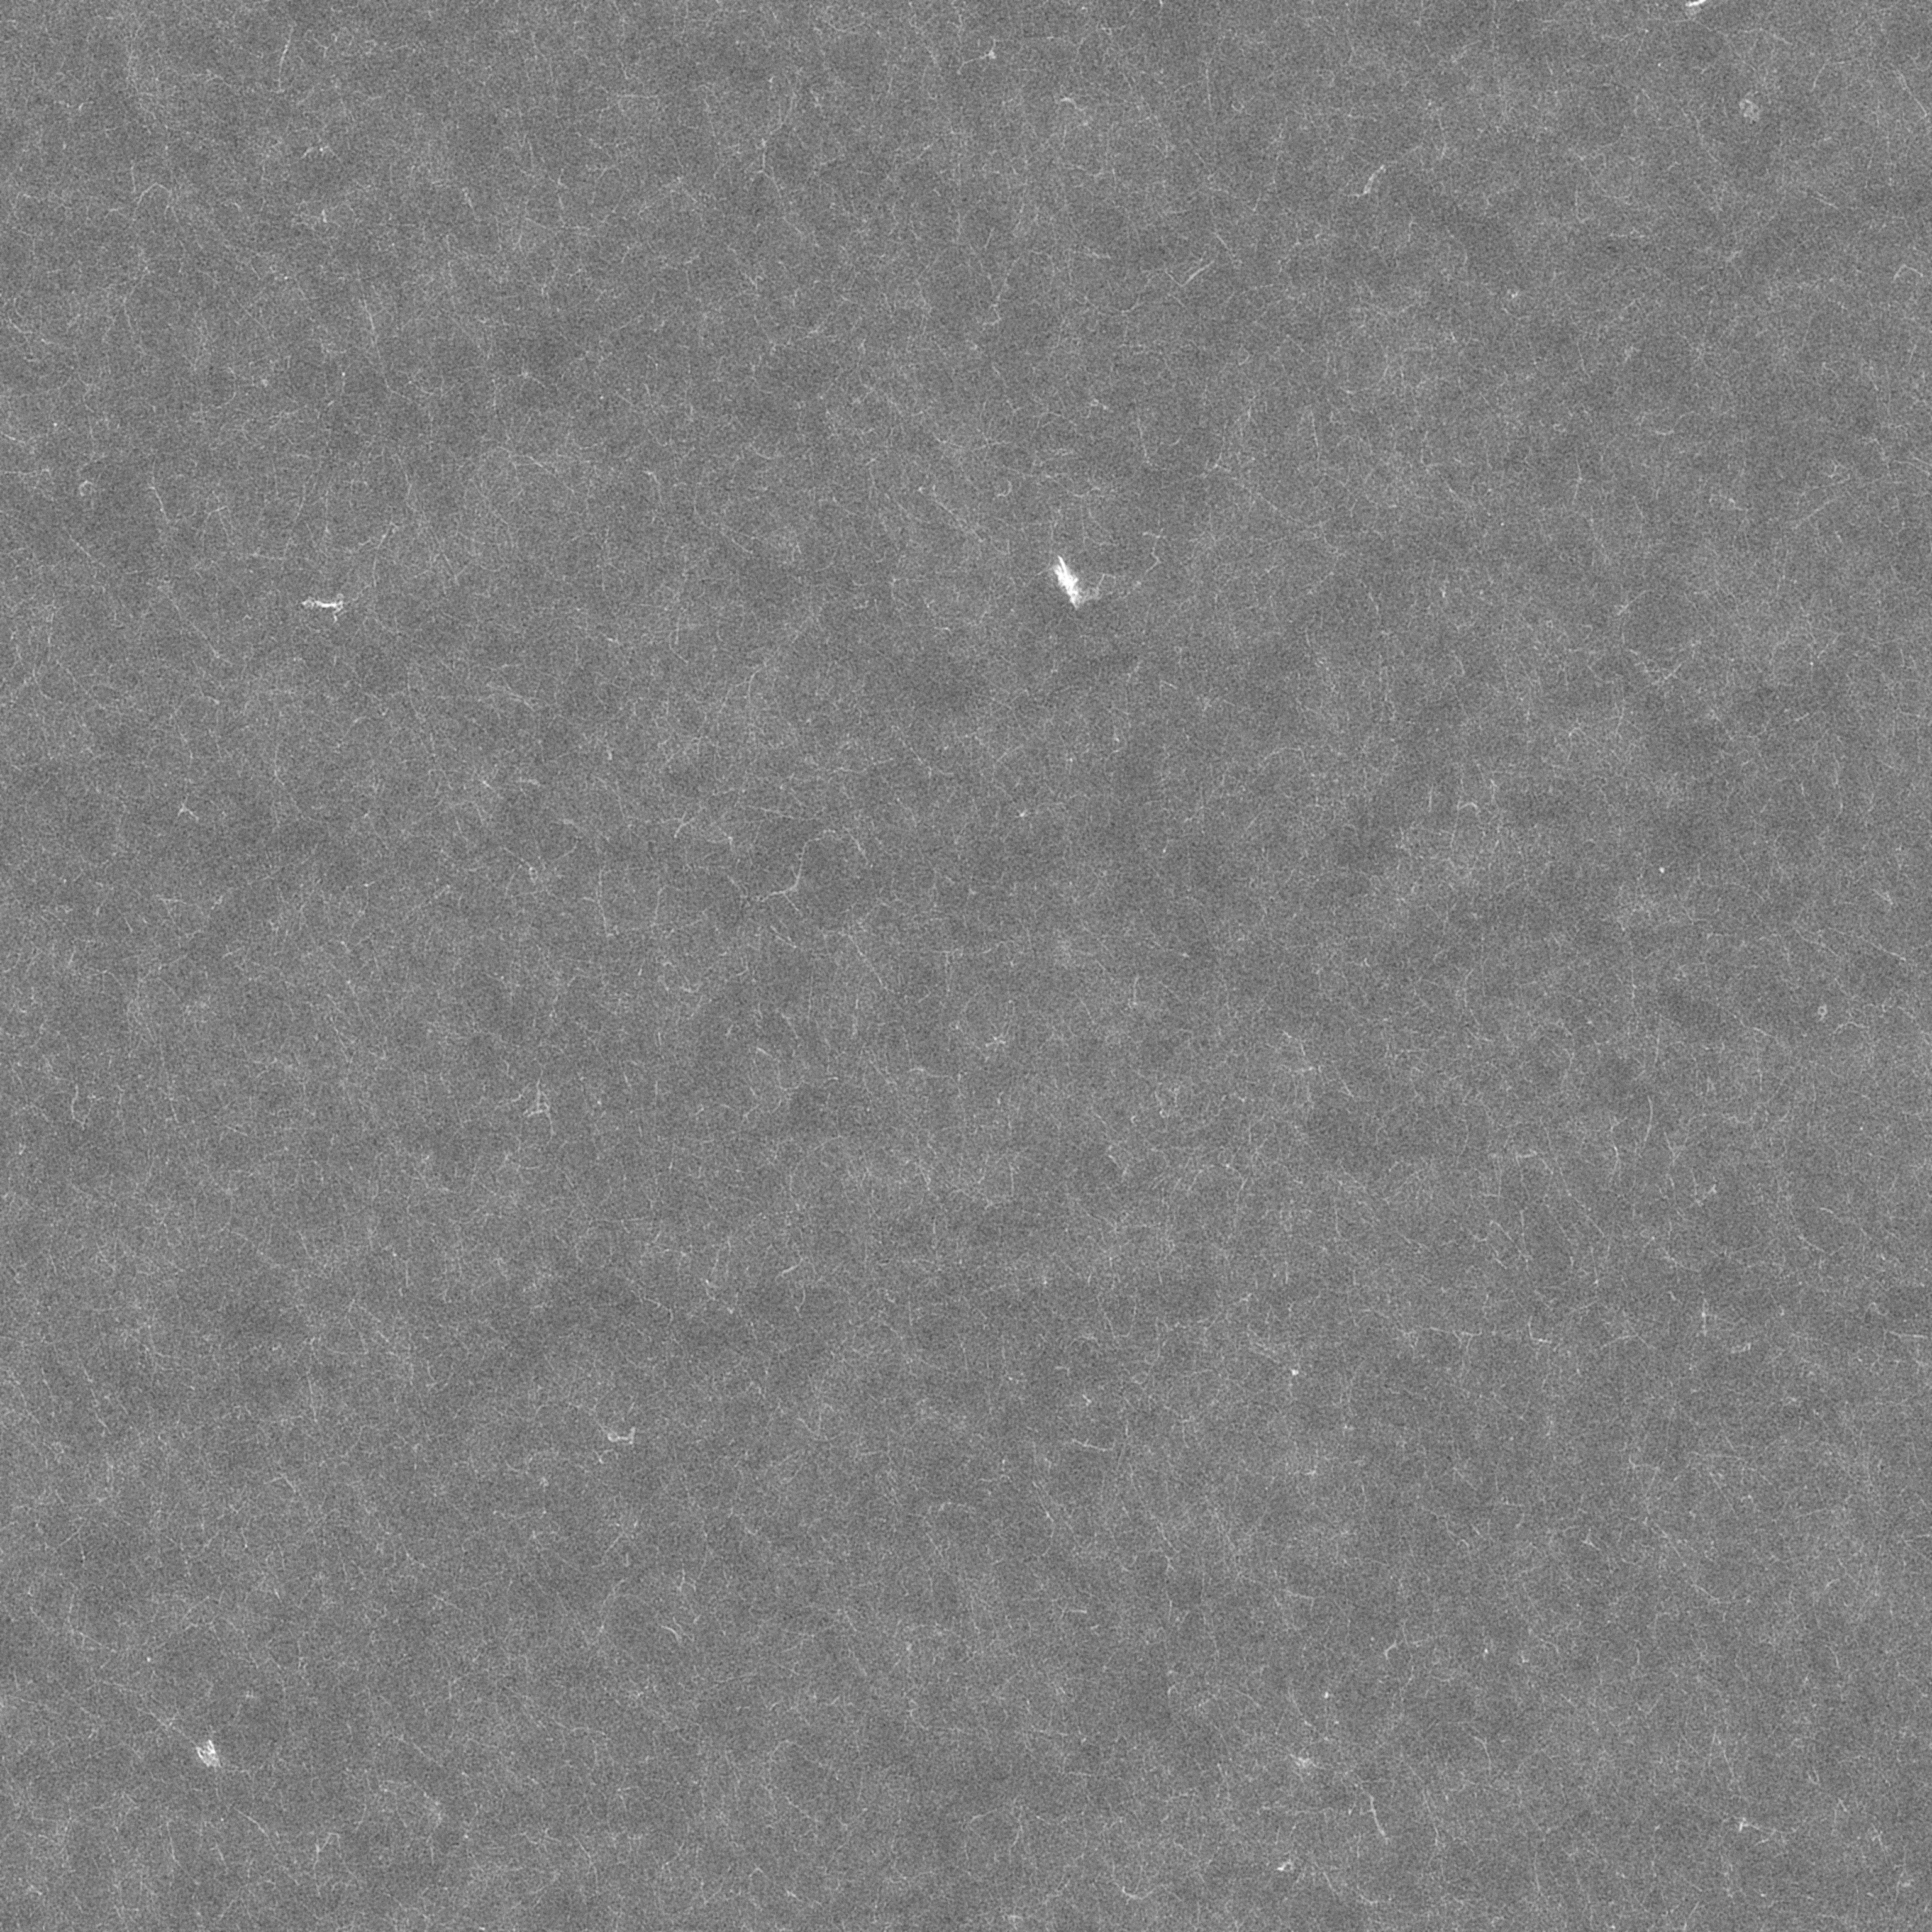

In [3]:
Image(filename='/home/phc/repository_local/wavelet_held/blsgsm_v1.0/output/blsgsm832_05.png')